In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import json
import xgboost as xg
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_India=pd.read_csv("Dataset/India_Budget_Dataset.csv")

In [4]:
df_India.head()

,Unnamed: 0,tconst,language,originalTitle,isAdult,startYear,runtimeMinutes,genres_x,averageRating,numVotes,directors,writers,Actors,Actress,Director,adult,belongs_to_collection,budget,overview,popularity,production_companies,release_date,revenue,spoken_languages,status,tagline
0,0,tt0004972,en,The Birth of a Nation,0,1915,195,"Drama,History,War",6.2,23962,nm0000428,"nm0228746,nm0000428,nm0940488",['Henry B. Walthall'],"['Miriam Cooper', 'Lillian Gish', 'Mae Marsh']",['D.W. Griffith'],False,NaN,100000,The Birth of A Nation is a silent film from 19...,5.113205,"[{'name': 'Epoch Film Co.', 'id': 351}]",1915-02-08,11000000.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,The fiery cross of the Ku Klux Klan.
1,1,tt0011960,en,Die Bergkatze,0,1921,79,"Comedy,Drama,Romance",6.9,1157,nm0523932,"nm0473134,nm0523932","['Hermann Thimig', 'Paul Heidemann', 'Victor J...","['Marga Köhler', 'Edith Meller', 'Pola Negri']",['Ernst Lubitsch'],False,NaN,0,A charismatic lieutenant newly assigned to a r...,0.732999,"[{'name': 'Projektions-AG Union (PAGU)', 'id':...",1921-04-14,0.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN
2,2,tt0013688,en,The Toll of the Sea,0,1922,54,"Drama,Family,Fantasy",6.6,727,nm0291387,nm0547966,['Kenneth Harlan'],"['Beatrice Bentley', 'Etta Lee', 'Priscilla Mo...",['Chester M. Franklin'],False,NaN,0,When young Lotus Flower sees an unconscious ma...,0.994973,"[{'name': 'Metro Pictures Corporation', 'id': ...",1922-11-26,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN
3,3,tt0014142,hi,The Hunchback of Notre Dame,0,1923,133,"Drama,Horror,Romance",7.2,5262,nm0941637,"nm0401076,nm0790622,nm0522871,nm0730929","['Norman Kerry', 'Lon Chaney']","['Kate Lester', 'Patsy Ruth Miller']",['Wallace Worsley'],False,NaN,0,Hunchback's story revolves around a beautiful ...,1.469045,"[{'name': 'Universal Pictures', 'id': 33}]",1923-09-06,0.0,[],Released,NaN
4,4,tt0015016,en,The Iron Horse,0,1924,150,"History,Romance,Western",7.2,2131,nm0000406,"nm0448981,nm0751246,nm0201544","[""George O'Brien"", 'Cyril Chadwick', 'Charles ...",['Madge Bellamy'],['John Ford'],False,NaN,0,"Springfield, Illinois. Brandon, a surveyor, dr...",0.990037,"[{'name': 'Fox Film Corporation', 'id': 5488}]",1924-08-24,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN


In [5]:
df_India=df_India[(df_India['budget']!=0) & (df_India['revenue']!=0.0)]

In [6]:
label_encoder = LabelEncoder()
df_India['language']=label_encoder.fit_transform(df_India['language'])

In [7]:
df_India['language']

0       1
8       3
12      1
15      3
16      1
       ..
9770    1
9779    3
9780    1
9790    1
9791    3
Name: language, Length: 5031, dtype: int64

In [8]:
df_India['Genre-list']=df_India['genres_x'].apply(lambda x:x.split(',') if type(x)==str else [])

In [9]:
df_India['Genre-list']

0           [Drama, History, War]
8                 [Drama, Sci-Fi]
12      [Drama, Musical, Romance]
15        [Drama, Horror, Sci-Fi]
16        [Drama, Horror, Sci-Fi]
                  ...            
9770             [Drama, Romance]
9779             [Comedy, Family]
9780             [Comedy, Family]
9790    [Drama, Fantasy, Romance]
9791    [Drama, Fantasy, Romance]
Name: Genre-list, Length: 5031, dtype: object

In [10]:
genres=[]
for i in df_India['Genre-list']:
    genres.extend(i)

In [11]:
from collections import Counter
Counter(genres).most_common()

[('Drama', 2416),
 ('Action', 1743),
 ('Comedy', 1562),
 ('Adventure', 1285),
 ('Thriller', 977),
 ('Crime', 857),
 ('Romance', 852),
 ('Sci-Fi', 634),
 ('Horror', 584),
 ('Mystery', 560),
 ('Fantasy', 513),
 ('Family', 297),
 ('Animation', 296),
 ('Biography', 256),
 ('History', 114),
 ('Music', 98),
 ('Sport', 80),
 ('Musical', 67),
 ('War', 41),
 ('Western', 21),
 ('Film-Noir', 11),
 ('Documentary', 2)]

In [12]:
genres_no_repeats=[i[0] for i in Counter(genres).most_common()]

In [13]:
(genres_no_repeats)

['Drama',
 'Action',
 'Comedy',
 'Adventure',
 'Thriller',
 'Crime',
 'Romance',
 'Sci-Fi',
 'Horror',
 'Mystery',
 'Fantasy',
 'Family',
 'Animation',
 'Biography',
 'History',
 'Music',
 'Sport',
 'Musical',
 'War',
 'Western',
 'Film-Noir',
 'Documentary']

In [14]:
df_India['One-hot-genres']=df_India['Genre-list'].apply(lambda x: [int(genre in x) for genre in genres_no_repeats])

In [15]:
df_India['One-hot-genres']

0       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
8       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
12      [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
15      [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
16      [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9770    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
9779    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
9780    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
9790    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...
9791    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...
Name: One-hot-genres, Length: 5031, dtype: object

In [16]:
df_India['Actors']=df_India['Actors'].str.split("[").str.get(1)
df_India['Actors']=df_India['Actors'].str.split("]").str.get(0)
df_India['Actors']=df_India['Actors'].str.replace('"','')
df_India['Actors']=df_India['Actors'].str.replace("'",'')

In [17]:
df_India['Actors']

0                                      Henry B. Walthall
8       Rudolf Klein-Rogge, Gustav Fröhlich, Alfred Abel
12                              Charles King, Eddie Kane
15                Colin Clive, John Boles, Boris Karloff
16                Colin Clive, John Boles, Boris Karloff
                              ...                       
9770                        Shah Rukh Khan, Kunal Kapoor
9779    Charlie Wright, Tom Everett Scott, Jason Drucker
9780    Charlie Wright, Tom Everett Scott, Jason Drucker
9790                    McColm Cephas Jr., Casey Affleck
9791                    McColm Cephas Jr., Casey Affleck
Name: Actors, Length: 5031, dtype: object

In [18]:
df_India['Actor-list']=df_India['Actors'].apply(lambda x:x.split(', ') if type(x)==str else [])

In [19]:
df_India['Actor-list']

0                                     [Henry B. Walthall]
8       [Rudolf Klein-Rogge, Gustav Fröhlich, Alfred A...
12                             [Charles King, Eddie Kane]
15               [Colin Clive, John Boles, Boris Karloff]
16               [Colin Clive, John Boles, Boris Karloff]
                              ...                        
9770                       [Shah Rukh Khan, Kunal Kapoor]
9779    [Charlie Wright, Tom Everett Scott, Jason Druc...
9780    [Charlie Wright, Tom Everett Scott, Jason Druc...
9790                   [McColm Cephas Jr., Casey Affleck]
9791                   [McColm Cephas Jr., Casey Affleck]
Name: Actor-list, Length: 5031, dtype: object

In [20]:
actors=[]
for i in df_India['Actor-list']:
    actors.extend(i)

In [21]:
from collections import Counter
Counter(actors).most_common()

[('Tom Cruise', 74),
 ('Johnny Depp', 70),
 ('Harrison Ford', 62),
 ('Bruce Willis', 60),
 ('Samuel L. Jackson', 55),
 ('Arnold Schwarzenegger', 51),
 ('Liam Neeson', 48),
 ('Tom Hanks', 46),
 ('Morgan Freeman', 46),
 ('Robert De Niro', 44),
 ('Nicolas Cage', 44),
 ('Keanu Reeves', 44),
 ('George Clooney', 44),
 ('Matt Damon', 42),
 ('Michael Keaton', 40),
 ('Mark Wahlberg', 40),
 ('Gene Hackman', 39),
 ('Brad Pitt', 39),
 ('Willem Dafoe', 38),
 ('Adam Sandler', 38),
 ('Gary Oldman', 37),
 ('Will Smith', 37),
 ('Dwayne Johnson', 37),
 ('Jim Carrey', 36),
 ('Hugh Jackman', 36),
 ('Vin Diesel', 36),
 ('Shah Rukh Khan', 35),
 ('Aamir Khan', 35),
 ('Owen Wilson', 35),
 ('Ryan Reynolds', 35),
 ('Russell Crowe', 34),
 ('Jack Nicholson', 33),
 ('Anthony Hopkins', 33),
 ('Leonardo DiCaprio', 33),
 ('Ewan McGregor', 33),
 ('Jason Statham', 33),
 ('Dustin Hoffman', 32),
 ('Bill Murray', 32),
 ('Denzel Washington', 32),
 ('Jake Gyllenhaal', 32),
 ('Antonio Banderas', 31),
 ('James Franco', 31),
 

In [22]:
actors_no_repeats=[i[0] for i in Counter(actors).most_common()]

In [23]:
(actors_no_repeats)

['Tom Cruise',
 'Johnny Depp',
 'Harrison Ford',
 'Bruce Willis',
 'Samuel L. Jackson',
 'Arnold Schwarzenegger',
 'Liam Neeson',
 'Tom Hanks',
 'Morgan Freeman',
 'Robert De Niro',
 'Nicolas Cage',
 'Keanu Reeves',
 'George Clooney',
 'Matt Damon',
 'Michael Keaton',
 'Mark Wahlberg',
 'Gene Hackman',
 'Brad Pitt',
 'Willem Dafoe',
 'Adam Sandler',
 'Gary Oldman',
 'Will Smith',
 'Dwayne Johnson',
 'Jim Carrey',
 'Hugh Jackman',
 'Vin Diesel',
 'Shah Rukh Khan',
 'Aamir Khan',
 'Owen Wilson',
 'Ryan Reynolds',
 'Russell Crowe',
 'Jack Nicholson',
 'Anthony Hopkins',
 'Leonardo DiCaprio',
 'Ewan McGregor',
 'Jason Statham',
 'Dustin Hoffman',
 'Bill Murray',
 'Denzel Washington',
 'Jake Gyllenhaal',
 'Antonio Banderas',
 'James Franco',
 'Gerard Butler',
 'Daniel Radcliffe',
 'Ajith Kumar',
 'Steve Carell',
 'Bradley Cooper',
 'Matthew McConaughey',
 'Jude Law',
 'Ben Stiller',
 'Max von Sydow',
 'Ben Kingsley',
 'Michael Douglas',
 'Chris Evans',
 'John Travolta',
 'Tommy Lee Jones',


In [24]:
df_India['One-hot-Actors']=df_India['Actor-list'].apply(lambda x: [int(act in x) for act in actors_no_repeats])

In [25]:
df_India['One-hot-Actors']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9770    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9779    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9780    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9790    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9791    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: One-hot-Actors, Length: 5031, dtype: object

In [26]:
len(df_India['One-hot-Actors'].iloc[0])

2844

In [27]:
df_India.columns

Index(['Unnamed: 0', 'tconst', 'language', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres_x', 'averageRating', 'numVotes',
       'directors', 'writers', 'Actors', 'Actress', 'Director', 'adult',
       'belongs_to_collection', 'budget', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'spoken_languages',
       'status', 'tagline', 'Genre-list', 'One-hot-genres', 'Actor-list',
       'One-hot-Actors'],
      dtype='object')

In [28]:
df_India['Director']=df_India['Director'].str.split("[").str.get(1)
df_India['Director']=df_India['Director'].str.split("]").str.get(0)
df_India['Director']=df_India['Director'].str.replace('"','')
df_India['Director']=df_India['Director'].str.replace("'",'')

In [29]:
df_India['Director']

0        D.W. Griffith
8           Fritz Lang
12      Harry Beaumont
15         James Whale
16         James Whale
             ...      
9770      Gauri Shinde
9779      David Bowers
9780      David Bowers
9790      David Lowery
9791      David Lowery
Name: Director, Length: 5031, dtype: object

In [30]:
df_India['Director-list']=df_India['Director'].apply(lambda x:x.split(', ') if type(x)==str else [])

In [31]:
df_India['Director-list']

0        [D.W. Griffith]
8           [Fritz Lang]
12      [Harry Beaumont]
15         [James Whale]
16         [James Whale]
              ...       
9770      [Gauri Shinde]
9779      [David Bowers]
9780      [David Bowers]
9790      [David Lowery]
9791      [David Lowery]
Name: Director-list, Length: 5031, dtype: object

In [32]:
directors=[]
for i in df_India['Director-list']:
    directors.extend(i)

In [33]:
from collections import Counter
Counter(directors).most_common()

[('Steven Spielberg', 79),
 ('Tim Burton', 68),
 ('Paul Verhoeven', 34),
 ('Ridley Scott', 33),
 ('Robert Zemeckis', 33),
 ('M. Night Shyamalan', 32),
 ('Steven Soderbergh', 29),
 ('Sam Raimi', 27),
 ('Martin Scorsese', 25),
 ('Robert Rodriguez', 25),
 ('Hayao Miyazaki', 23),
 ('Richard Donner', 22),
 ('Ivan Reitman', 22),
 ('James Cameron', 22),
 ('Roland Emmerich', 21),
 ('Michael Bay', 21),
 ('Alfred Hitchcock', 20),
 ('Tony Scott', 20),
 ('Joel Schumacher', 20),
 ('Quentin Tarantino', 20),
 ('Ang Lee', 19),
 ('Oliver Stone', 18),
 ('Peter Jackson', 18),
 ('Lasse Hallström', 18),
 ('William Friedkin', 17),
 ('Rob Reiner', 17),
 ('David Fincher', 17),
 ('Paul W.S. Anderson', 17),
 ('Brian De Palma', 16),
 ('John Hughes', 16),
 ('Ron Howard', 16),
 ('Martin Campbell', 16),
 ('Gore Verbinski', 16),
 ('Mani Ratnam', 16),
 ('Marc Forster', 16),
 ('Roman Polanski', 15),
 ('Chris Columbus', 15),
 ('Brad Silberling', 15),
 ('Rob Cohen', 15),
 ('Guillermo del Toro', 15),
 ('Danny Boyle', 15)

In [34]:
directors_no_repeats=[i[0] for i in Counter(directors).most_common()]

In [35]:
(directors_no_repeats)

['Steven Spielberg',
 'Tim Burton',
 'Paul Verhoeven',
 'Ridley Scott',
 'Robert Zemeckis',
 'M. Night Shyamalan',
 'Steven Soderbergh',
 'Sam Raimi',
 'Martin Scorsese',
 'Robert Rodriguez',
 'Hayao Miyazaki',
 'Richard Donner',
 'Ivan Reitman',
 'James Cameron',
 'Roland Emmerich',
 'Michael Bay',
 'Alfred Hitchcock',
 'Tony Scott',
 'Joel Schumacher',
 'Quentin Tarantino',
 'Ang Lee',
 'Oliver Stone',
 'Peter Jackson',
 'Lasse Hallström',
 'William Friedkin',
 'Rob Reiner',
 'David Fincher',
 'Paul W.S. Anderson',
 'Brian De Palma',
 'John Hughes',
 'Ron Howard',
 'Martin Campbell',
 'Gore Verbinski',
 'Mani Ratnam',
 'Marc Forster',
 'Roman Polanski',
 'Chris Columbus',
 'Brad Silberling',
 'Rob Cohen',
 'Guillermo del Toro',
 'Danny Boyle',
 'Francis Ford Coppola',
 'Peter Weir',
 'Phillip Noyce',
 'Ethan Coen',
 'Joel Coen',
 'Rob Minkoff',
 'Dennis Dugan',
 'Ashutosh Gowariker',
 'Shawn Levy',
 'David Lynch',
 'Wes Craven',
 'Barry Sonnenfeld',
 'Wolfgang Petersen',
 'Doug Liman

In [36]:
df_India['One-hot-Directors']=df_India['Director-list'].apply(lambda x: [int(di in x) for di in directors_no_repeats])

In [37]:
df_India['One-hot-Directors']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9770    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9779    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9780    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9790    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9791    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: One-hot-Directors, Length: 5031, dtype: object

In [38]:
len(df_India['One-hot-Directors'].iloc[0])

1504

In [39]:
df_India['Actress']=df_India['Actress'].str.split("[").str.get(1)
df_India['Actress']=df_India['Actress'].str.split("]").str.get(0)
df_India['Actress']=df_India['Actress'].str.replace('"','')
df_India['Actress']=df_India['Actress'].str.replace("'",'')

In [40]:
df_India['Actress']

0       Miriam Cooper, Lillian Gish, Mae Marsh
8                                Brigitte Helm
12                     Anita Page, Bessie Love
15                                  Mae Clarke
16                                  Mae Clarke
                         ...                  
9770              Priyanka Moodley, Alia Bhatt
9779                        Alicia Silverstone
9780                        Alicia Silverstone
9790           Kenneisha Thompson, Rooney Mara
9791           Kenneisha Thompson, Rooney Mara
Name: Actress, Length: 5031, dtype: object

In [41]:
df_India['Actress-list']=df_India['Actress'].apply(lambda x:x.split(', ') if type(x)==str else [])

In [42]:
df_India['Actress-list']

0       [Miriam Cooper, Lillian Gish, Mae Marsh]
8                                [Brigitte Helm]
12                     [Anita Page, Bessie Love]
15                                  [Mae Clarke]
16                                  [Mae Clarke]
                          ...                   
9770              [Priyanka Moodley, Alia Bhatt]
9779                        [Alicia Silverstone]
9780                        [Alicia Silverstone]
9790           [Kenneisha Thompson, Rooney Mara]
9791           [Kenneisha Thompson, Rooney Mara]
Name: Actress-list, Length: 5031, dtype: object

In [43]:
actress=[]
for i in df_India['Actress-list']:
    actress.extend(i)

In [44]:
from collections import Counter
Counter(actress).most_common()

[('Naomi Watts', 46),
 ('Nicole Kidman', 45),
 ('Cate Blanchett', 42),
 ('Cameron Diaz', 41),
 ('Angelina Jolie', 39),
 ('Kirsten Dunst', 38),
 ('Julia Roberts', 38),
 ('Julianne Moore', 38),
 ('Michelle Pfeiffer', 37),
 ('Kate Winslet', 37),
 ('Charlize Theron', 36),
 ('Rachel McAdams', 36),
 ('Winona Ryder', 35),
 ('Jennifer Aniston', 35),
 ('Anne Hathaway', 35),
 ('Sigourney Weaver', 34),
 ('Sharon Stone', 31),
 ('Sandra Bullock', 31),
 ('Kristen Stewart', 31),
 ('Scarlett Johansson', 31),
 ('Meryl Streep', 30),
 ('Natalie Portman', 30),
 ('Rachel Weisz', 30),
 ('Jennifer Connelly', 29),
 ('Halle Berry', 29),
 ('Amy Adams', 29),
 ('Kim Basinger', 28),
 ('Keira Knightley', 28),
 ('Emma Watson', 28),
 ('Anna Faris', 27),
 ('Kate Beckinsale', 27),
 ('Drew Barrymore', 26),
 ('Helena Bonham Carter', 25),
 ('Robin Wright', 24),
 ('Catherine Zeta-Jones', 24),
 ('Jessica Alba', 24),
 ('Rose Byrne', 24),
 ('Priyanka Chopra Jonas', 24),
 ('Rosario Dawson', 23),
 ('Emily Blunt', 23),
 ('Emma S

In [45]:
actress_no_repeats=[i[0] for i in Counter(actress).most_common()]

In [46]:
(actress_no_repeats)

['Naomi Watts',
 'Nicole Kidman',
 'Cate Blanchett',
 'Cameron Diaz',
 'Angelina Jolie',
 'Kirsten Dunst',
 'Julia Roberts',
 'Julianne Moore',
 'Michelle Pfeiffer',
 'Kate Winslet',
 'Charlize Theron',
 'Rachel McAdams',
 'Winona Ryder',
 'Jennifer Aniston',
 'Anne Hathaway',
 'Sigourney Weaver',
 'Sharon Stone',
 'Sandra Bullock',
 'Kristen Stewart',
 'Scarlett Johansson',
 'Meryl Streep',
 'Natalie Portman',
 'Rachel Weisz',
 'Jennifer Connelly',
 'Halle Berry',
 'Amy Adams',
 'Kim Basinger',
 'Keira Knightley',
 'Emma Watson',
 'Anna Faris',
 'Kate Beckinsale',
 'Drew Barrymore',
 'Helena Bonham Carter',
 'Robin Wright',
 'Catherine Zeta-Jones',
 'Jessica Alba',
 'Rose Byrne',
 'Priyanka Chopra Jonas',
 'Rosario Dawson',
 'Emily Blunt',
 'Emma Stone',
 'Jennifer Lawrence',
 'Gwyneth Paltrow',
 'Elizabeth Banks',
 'Michelle Monaghan',
 'Zoe Saldana',
 'Geena Davis',
 'Demi Moore',
 'Milla Jovovich',
 'Laura Linney',
 'Jennifer Lopez',
 'Carla Gugino',
 'Chloë Grace Moretz',
 'Amanda

In [47]:
df_India['One-hot-Actress']=np.array(df_India['Actress-list'].apply(lambda x: [int(a in x) for a in actress_no_repeats]))

In [48]:
df_India['One-hot-Actress']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9770    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9779    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9780    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9790    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9791    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: One-hot-Actress, Length: 5031, dtype: object

In [49]:
len(df_India['One-hot-Actress'].iloc[0])

1942

In [50]:
df_India.columns

Index(['Unnamed: 0', 'tconst', 'language', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres_x', 'averageRating', 'numVotes',
       'directors', 'writers', 'Actors', 'Actress', 'Director', 'adult',
       'belongs_to_collection', 'budget', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'spoken_languages',
       'status', 'tagline', 'Genre-list', 'One-hot-genres', 'Actor-list',
       'One-hot-Actors', 'Director-list', 'One-hot-Directors', 'Actress-list',
       'One-hot-Actress'],
      dtype='object')

In [51]:
df_India=df_India.drop(['Unnamed: 0', 'tconst','genres_x', 'isAdult','directors', 'writers', 'Actors', 'Actress', 'Director', 'adult','belongs_to_collection', 'release_date',  'spoken_languages',
       'status', 'tagline', 'Genre-list','Actor-list','Director-list', 'Actress-list',],axis=1)

In [59]:
df_India['production_companies'].dtypes

dtype('O')

In [60]:
df_India['production_companies_x']=df_India.production_companies.str.replace('[','')
df_India['production_companies_x']=df_India.production_companies_x.str.replace(']','')

In [61]:
final_list = df_India['production_companies_x'].tolist()

In [62]:
df_India=df_India[(df_India['production_companies_x']!="")]

In [63]:
final=[]
for i in range(len(final_list)):
     Dict = eval(final_list[i])
     if isinstance(Dict,dict):
        final.append(Dict['name'])
     else:
          X=''
          for tup in Dict:
              X=X+tup['name']+','
          final.append(X)    

In [64]:
for i in range(len(final)):
    if(final[i][-1]==','):
        temp=final[i][:-1]
        final[i]=temp

In [65]:
df_India['production_companies_x']=final

In [66]:
df_India=df_India[(df_India['production_companies_x']!="")]

In [67]:
df_India['production_companies_x']

0                                          Epoch Film Co.
8                 Paramount Pictures,Universum Film (UFA)
12                              Metro-Goldwyn-Mayer (MGM)
15                                     Universal Pictures
16                                     Universal Pictures
                              ...                        
9770    Red Chillies Entertainment,Dharma Productions,...
9779                                Twentieth Century Fox
9780                                Twentieth Century Fox
9790           Sailor Bear,A24,Zero Trans Fat Productions
9791           Sailor Bear,A24,Zero Trans Fat Productions
Name: production_companies_x, Length: 4971, dtype: object

In [68]:
df_India['P-list']=df_India['production_companies_x'].apply(lambda x:x.split(', ') if type(x)==str else [])

In [69]:
df_India['P-list']

0                                        [Epoch Film Co.]
8               [Paramount Pictures,Universum Film (UFA)]
12                            [Metro-Goldwyn-Mayer (MGM)]
15                                   [Universal Pictures]
16                                   [Universal Pictures]
                              ...                        
9770    [Red Chillies Entertainment,Dharma Productions...
9779                              [Twentieth Century Fox]
9780                              [Twentieth Century Fox]
9790         [Sailor Bear,A24,Zero Trans Fat Productions]
9791         [Sailor Bear,A24,Zero Trans Fat Productions]
Name: P-list, Length: 4971, dtype: object

In [70]:
prod=[]
for i in df_India['P-list']:
    prod.extend(i)

In [71]:
from collections import Counter
Counter(prod).most_common()

[('Paramount Pictures', 74),
 ('Twentieth Century Fox Film Corporation', 42),
 ('Warner Bros.', 36),
 ('Universal Pictures', 34),
 ('The', 31),
 ('Columbia Pictures', 29),
 ('Yash Raj Films', 28),
 ('Universal Pictures,Amblin Entertainment', 26),
 ('New Line Cinema', 25),
 ('Walt Disney Pictures,Pixar Animation Studios', 25),
 ('Metro-Goldwyn-Mayer (MGM)', 21),
 ('DreamWorks Animation', 20),
 ('Walt Disney Pictures', 18),
 ('Orion Pictures', 15),
 ('Eon Productions', 14),
 ('Warner Bros.,Dovemead Films,Film Export A.G.', 14),
 ('Dimension Films', 14),
 ('Columbia Pictures Corporation', 13),
 ('Lucasfilm,Paramount Pictures', 13),
 ('Walt Disney Pictures,Walt Disney Feature Animation', 13),
 ('Warner Bros.,Hoya Productions', 12),
 ('Touchstone Pictures', 12),
 ('Universal Pictures,Amblin Entertainment,U-Drive Productions', 12),
 ('PolyGram Filmed Entertainment,Warner Bros.', 12),
 ('Twentieth Century Fox Film Corporation,Lightstorm Entertainment', 12),
 ('Marvel Studios', 12),
 ('UTV Mot

In [72]:
prod_no_repeats=[i[0] for i in Counter(prod).most_common()]

In [73]:
(prod_no_repeats)

['Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Warner Bros.',
 'Universal Pictures',
 'The',
 'Columbia Pictures',
 'Yash Raj Films',
 'Universal Pictures,Amblin Entertainment',
 'New Line Cinema',
 'Walt Disney Pictures,Pixar Animation Studios',
 'Metro-Goldwyn-Mayer (MGM)',
 'DreamWorks Animation',
 'Walt Disney Pictures',
 'Orion Pictures',
 'Eon Productions',
 'Warner Bros.,Dovemead Films,Film Export A.G.',
 'Dimension Films',
 'Columbia Pictures Corporation',
 'Lucasfilm,Paramount Pictures',
 'Walt Disney Pictures,Walt Disney Feature Animation',
 'Warner Bros.,Hoya Productions',
 'Touchstone Pictures',
 'Universal Pictures,Amblin Entertainment,U-Drive Productions',
 'PolyGram Filmed Entertainment,Warner Bros.',
 'Twentieth Century Fox Film Corporation,Lightstorm Entertainment',
 'Marvel Studios',
 'UTV Motion Pictures',
 'Walt Disney Pictures,Walt Disney Animation Studios',
 'Universal Pictures,Zanuck/Brown Productions',
 'Geffen Company',
 'Columbia Pictures 

In [74]:
df_India['One-hot-Prod']=np.array(df_India['P-list'].apply(lambda x: [int(p in x) for p in prod_no_repeats]))

In [75]:
df_India['One-hot-Prod']

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
15      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9770    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9779    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9780    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9790    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9791    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: One-hot-Prod, Length: 4971, dtype: object

In [76]:
len(df_India['One-hot-Prod'].iloc[0])

2367

In [77]:
df_India['profit']=df_India['revenue']-df_India['budget']

In [78]:
df_India.replace('\\N',np.nan,inplace=True)

In [79]:
df_India.isnull().sum()

language                  0
originalTitle             0
startYear                 0
runtimeMinutes            0
averageRating             0
numVotes                  0
budget                    0
overview                  0
popularity                0
production_companies      0
revenue                   0
One-hot-genres            0
One-hot-Actors            0
One-hot-Directors         0
One-hot-Actress           0
production_companies_x    0
P-list                    0
One-hot-Prod              0
profit                    0
dtype: int64

In [80]:
df_India=df_India.drop(['originalTitle', 'overview', 'production_companies'],axis=1)

In [81]:
df_India=df_India.drop(['production_companies_x','P-list'],axis=1)

In [82]:
df_India

,language,startYear,runtimeMinutes,averageRating,numVotes,budget,popularity,revenue,One-hot-genres,One-hot-Actors,One-hot-Directors,One-hot-Actress,One-hot-Prod,profit
0,1,1915,195,6.2,23962,100000,5.113205,11000000.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10900000.0
8,3,1927,153,8.3,167711,92620000,14.487867,650422.0,"[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-91969578.0
12,1,1929,100,5.7,6943,379000,0.758012,4358000.0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",3979000.0
15,3,1931,70,7.8,69455,291000,8.091603,12000000.0,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11709000.0
16,1,1931,70,7.8,69455,291000,8.091603,12000000.0,"[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11709000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,1,2016,151,7.5,38208,4300000,3.699552,3376375.0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-923625.0
9779,3,2017,91,4.3,8272,22000000,28.176992,40120144.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18120144.0
9780,1,2017,91,4.3,8272,22000000,28.176992,40120144.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",18120144.0
9790,1,2017,92,6.9,67211,100000,24.339781,15584255.0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",15484255.0


In [84]:
df_India.columns=["Language","Year","Time","Rating","Votes","Budget","Popularity","Revenue","Genres","Actors","Directors","Actress","Production","Profit"]

In [85]:
df_India.reset_index(inplace=True,drop=True)

In [86]:
df_India.dtypes

Language        int64
Year            int64
Time            int64
Rating        float64
Votes           int64
Budget          int64
Popularity    float64
Revenue       float64
Genres         object
Actors         object
Directors      object
Actress        object
Production     object
Profit        float64
dtype: object

In [87]:
arr = np.array(df_India['Genres'].to_list())
df_India['Genres']=np.stack(arr).astype(None)

arr = np.array(df_India['Actors'].to_list())
df_India['Actors']=np.stack(arr).astype(None)

arr = np.array(df_India['Directors'].to_list())
df_India['Directors']=np.stack(arr).astype(None)

arr = np.array(df_India['Actress'].to_list())
df_India['Actress']=np.stack(arr).astype(None)

arr = np.array(df_India['Production'].to_list())
df_India['Production']=np.stack(arr).astype(None)

In [88]:
# Load the data
X, y = df_India[["Language","Year","Time","Votes","Budget","Popularity","Revenue","Genres","Actors","Directors","Actress","Production","Profit"]], df_India[["Rating"]]

In [89]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state = 123)

In [90]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(train_X)
X_testscaled=sc_X.transform(test_X)

,Language,Year,Time,Rating,Votes,Budget,Popularity,Revenue,Genres,Actors,Directors,Actress,Production,Profit
Language,1.000000,-0.050196,0.096841,0.087193,0.096689,0.055673,0.024042,0.097552,-0.033389,0.029311,0.094262,0.016923,0.010972,0.099373
Year,-0.050196,1.000000,-0.063733,-0.261656,-0.039252,0.250198,0.066275,0.086797,-0.005647,-0.024498,-0.118913,0.042011,-0.176414,0.036202
Time,0.096841,-0.063733,1.000000,0.380935,0.221822,0.146872,0.050274,0.172648,0.290973,0.071757,0.096175,0.046423,-0.018024,0.163293
Rating,0.087193,-0.261656,0.380935,1.000000,0.496123,-0.077659,0.122171,0.151161,0.281275,0.037881,0.117419,-0.002529,0.046128,0.196638
Votes,0.096689,-0.039252,0.221822,0.496123,1.000000,0.365456,0.333707,0.585495,-0.089118,0.056151,0.152150,-0.010528,-0.001976,0.588278
Budget,0.055673,0.250198,0.146872,-0.077659,0.365456,1.000000,0.244725,0.707912,-0.306164,0.071699,0.002432,0.042603,-0.063487,0.566044
Popularity,0.024042,0.066275,0.050274,0.122171,0.333707,0.244725,1.000000,0.393833,-0.094307,0.009193,0.017433,-0.005212,-0.009487,0.395991
Revenue,0.097552,0.086797,0.172648,0.151161,0.585495,0.707912,0.393833,1.000000,-0.269795,0.086882,0.162683,-0.002334,-0.022932,0.982966
Genres,-0.033389,-0.005647,0.290973,0.281275,-0.089118,-0.306164,-0.094307,-0.269795,1.000000,0.008846,-0.037769,0.071638,0.058732,-0.235231
Actors,0.029311,-0.024498,0.071757,0.037881,0.056151,0.071699,0.009193,0.086882,0.008846,1.000000,0.077362,-0.011880,0.039760,0.082750


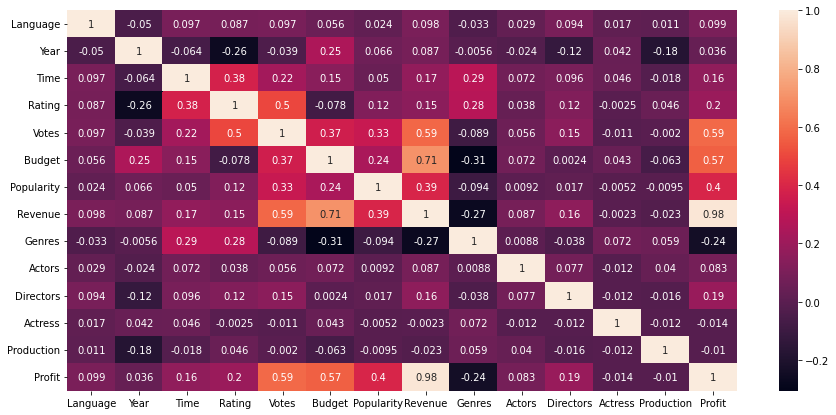

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
corr_matrix=df_India.corr()
sns.heatmap(corr_matrix,annot=True)
corr_matrix

XGBoost

In [92]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_trainscaled, train_y)
  
# Predict the model
pred = xgb_r.predict(X_testscaled)
  
# RMSE Computation
rmse=np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# MSE Computation
mse=MSE(test_y, pred)
print("MSE : % f" %(mse))

# MAE Computation
mae=MAE(test_y, pred)
print("MAE : % f" %(mae))


RMSE :  2.280173
MSE :  5.199187
MAE :  2.172728


Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_trainscaled,train_y) 

#Predict the model 
pred=regressor.predict(X_testscaled)

# RMSE Computation
rmse=np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# MSE Computation
mse=MSE(test_y, pred)
print("MSE : % f" %(mse))

# MAE Computation
mae=MAE(test_y, pred)
print("MAE : % f" %(mae))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RMSE :  0.406182
MSE :  0.164984
MAE :  0.257942


Linear regression

In [94]:
#Calling regressor object
regr = LinearRegression()

#Fit the model
regr.fit(X_trainscaled,train_y)

#Predict the model
pred=regr.predict(X_testscaled)

# RMSE Computation
rmse=np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# MSE Computation
mse=MSE(test_y, pred)
print("MSE : % f" %(mse))

# MAE Computation
mae=MAE(test_y, pred)
print("MAE : % f" %(mae))

RMSE :  0.710038
MSE :  0.504154
MAE :  0.526042


Tree regression

In [95]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_trainscaled,train_y)

#Predict the model
pred = regressor.predict(X_testscaled)

# RMSE Computation
rmse=np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# MSE Computation
mse=MSE(test_y, pred)
print("MSE : % f" %(mse))

# MAE Computation
mae=MAE(test_y, pred)
print("MAE : % f" %(mae))

RMSE :  0.524323
MSE :  0.274915
MAE :  0.228543


Support Vector Machine


In [96]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = regressor = SVR(kernel = 'rbf')
  
# fit the regressor with X and Y data
regressor.fit(X_trainscaled,train_y)

#Predict the model
pred = regressor.predict(X_testscaled)

# RMSE Computation
rmse=np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# MSE Computation
mse=MSE(test_y, pred)
print("MSE : % f" %(mse))

# MAE Computation
mae=MAE(test_y, pred)
print("MAE : % f" %(mae))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE :  0.620601
MSE :  0.385146
MAE :  0.427157


Neural Network

In [97]:
reg = MLPRegressor(hidden_layer_sizes=(64,64),activation="relu" ,random_state=1, max_iter=2000,batch_size=32).fit(X_trainscaled,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
pred=reg.predict(X_testscaled)
# RMSE Computation
rmse=np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# MSE Computation
mse=MSE(test_y, pred)
print("MSE : % f" %(mse))

# MAE Computation
mae=MAE(test_y, pred)
print("MAE : % f" %(mae))

RMSE :  0.598755
MSE :  0.358507
MAE :  0.428454
